# <span style="color:blue">EVAC Workshop 3: Multi-objective evolution</span>

**Module leader**

Simon O'Keefe: simon.okeefe@york.ac.uk

**Graduate Teaching Assistants**

Danny Roberts: danny.roberts@york.ac.uk

Tianda Sun: tianda.sun@york.ac.uk

## <span style="color:#0073e6">Prerequisites</span>


Before participating in this practical make sure that you have watched the the pre-workshop materials:
- Lecture 3
- Code walkthrough 5


# <span style="color:blue">Learning Objectives</span>

* Implement individuals with different representations to lists
* Implement and then examine multi-objective evolution
* Implement the Mu + Lamda algorithm manually, as needed for NGSA II

# <span style="color:blue">The problem: the kursawe function</span>

The Kursawe function has two objectives (see two equations below) that we want to minimize. It can have an arbirtarly number *N* of input variables *xi*, which take values within the range -5 and 5.

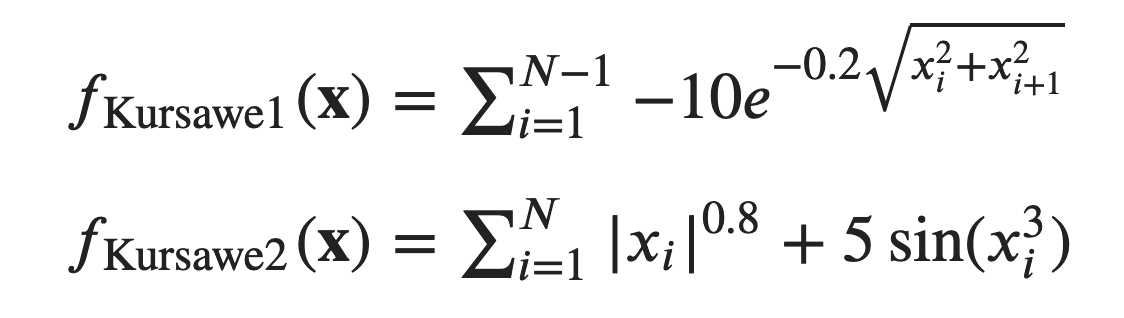

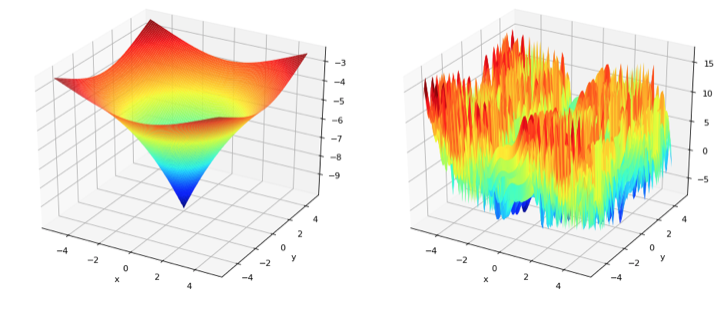

There are built-in benchmark problems in DEAP. You import them like this:

In [251]:
from deap import benchmarks

The kursawe function can be called like this:

In [252]:
exampleInputs = [-5, 2, 5]
benchmarks.kursawe(exampleInputs)

(-6.812092298638419, 13.935688996486114)

# <span style="color:blue">Task 1: Implement a multi objective GA for the kursawe function</span>

Create a GA that gives inputs that minimize the multi-objective function. For this, the number of inputs to use should be 3 to start with (which you can visualize). Then try changing it to 5.

## <span style="color:blue">GA Code Here</span>

In [253]:
NGEN = 250
CXPB = 0.5
MUTPB = 0.2
popSize = MU = 200
LAMBDA = 400
KURSAWE_INP_COUNT = 3

In [254]:
import random
from deap import base, creator, tools

creator.create("Fitness", base.Fitness, weights=(-1.0, -1.0))  # minimising both
creator.create("Individual", list, fitness=creator.Fitness)
toolbox = base.Toolbox()
toolbox.register("attr_kursawe_bounds", random.uniform, -5.0, 5.0)
toolbox.register(
    "individual",
    tools.initRepeat,
    creator.Individual,
    toolbox.attr_kursawe_bounds,
    KURSAWE_INP_COUNT,
)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.4, indpb=0.2)
toolbox.register("evaluate", benchmarks.kursawe)
toolbox.register("select", tools.selNSGA2)

/Users/ivanbar/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/ivanbar/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [255]:
import numpy as np

pop = toolbox.population(n=popSize)
hof = tools.ParetoFront(similar=np.allclose)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)

In [256]:
from deap import algorithms

pop, log = algorithms.eaMuPlusLambda(
    pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats, halloffame=hof
)

gen	nevals	avg                      	std                    	min                      	max                      
0  	200   	[-9.82799265  5.7753538 ]	[2.62125279 5.78967895]	[-18.7743191  -8.1958652]	[-5.16227457 19.87491654]
1  	273   	[-12.22757005   1.08582031]	[2.75156251 4.7768562 ]	[-18.7743191  -8.416004 ]	[-7.00725413 14.01704451]
2  	292   	[-13.41776628  -2.31004365]	[2.97710846 3.6935715 ]	[-19.20164381  -9.30461532]	[-7.00725413  7.94477552]
3  	281   	[-15.0566232   -3.21438767]	[2.49202149 3.74906645]	[-19.20164381  -9.81962166]	[-9.7009783   5.90546358]
4  	265   	[-15.20620477  -4.54177637]	[2.34759306 3.41150265]	[-19.20164381 -10.13917999]	[-10.17094865   1.23350617]
5  	261   	[-16.64547338  -3.46220652]	[1.75173451 3.51214192]	[-19.20164381 -10.13917999]	[-12.37056588   0.86786895]
6  	284   	[-16.4469569   -4.51020558]	[1.7970239  3.64178363]	[-19.22577462 -10.56852623]	[-13.437746     0.79720004]
7  	285   	[-16.74108428  -4.48211344]	[1.46538292 3.37413145]	[-19.

## <span style="color:blue">Plot the results</span>

Be sure to plot the pareto front at the end. This is possible with the 3 arguments version of this problem. You can plot using a 3D plot in Seaborn. e.g.



You can also plot fitness in 2D using:

```sns.kdeplot(x,y)```

Text(0.5, -0.046000000000000006, 'Final population (3 inputs)')

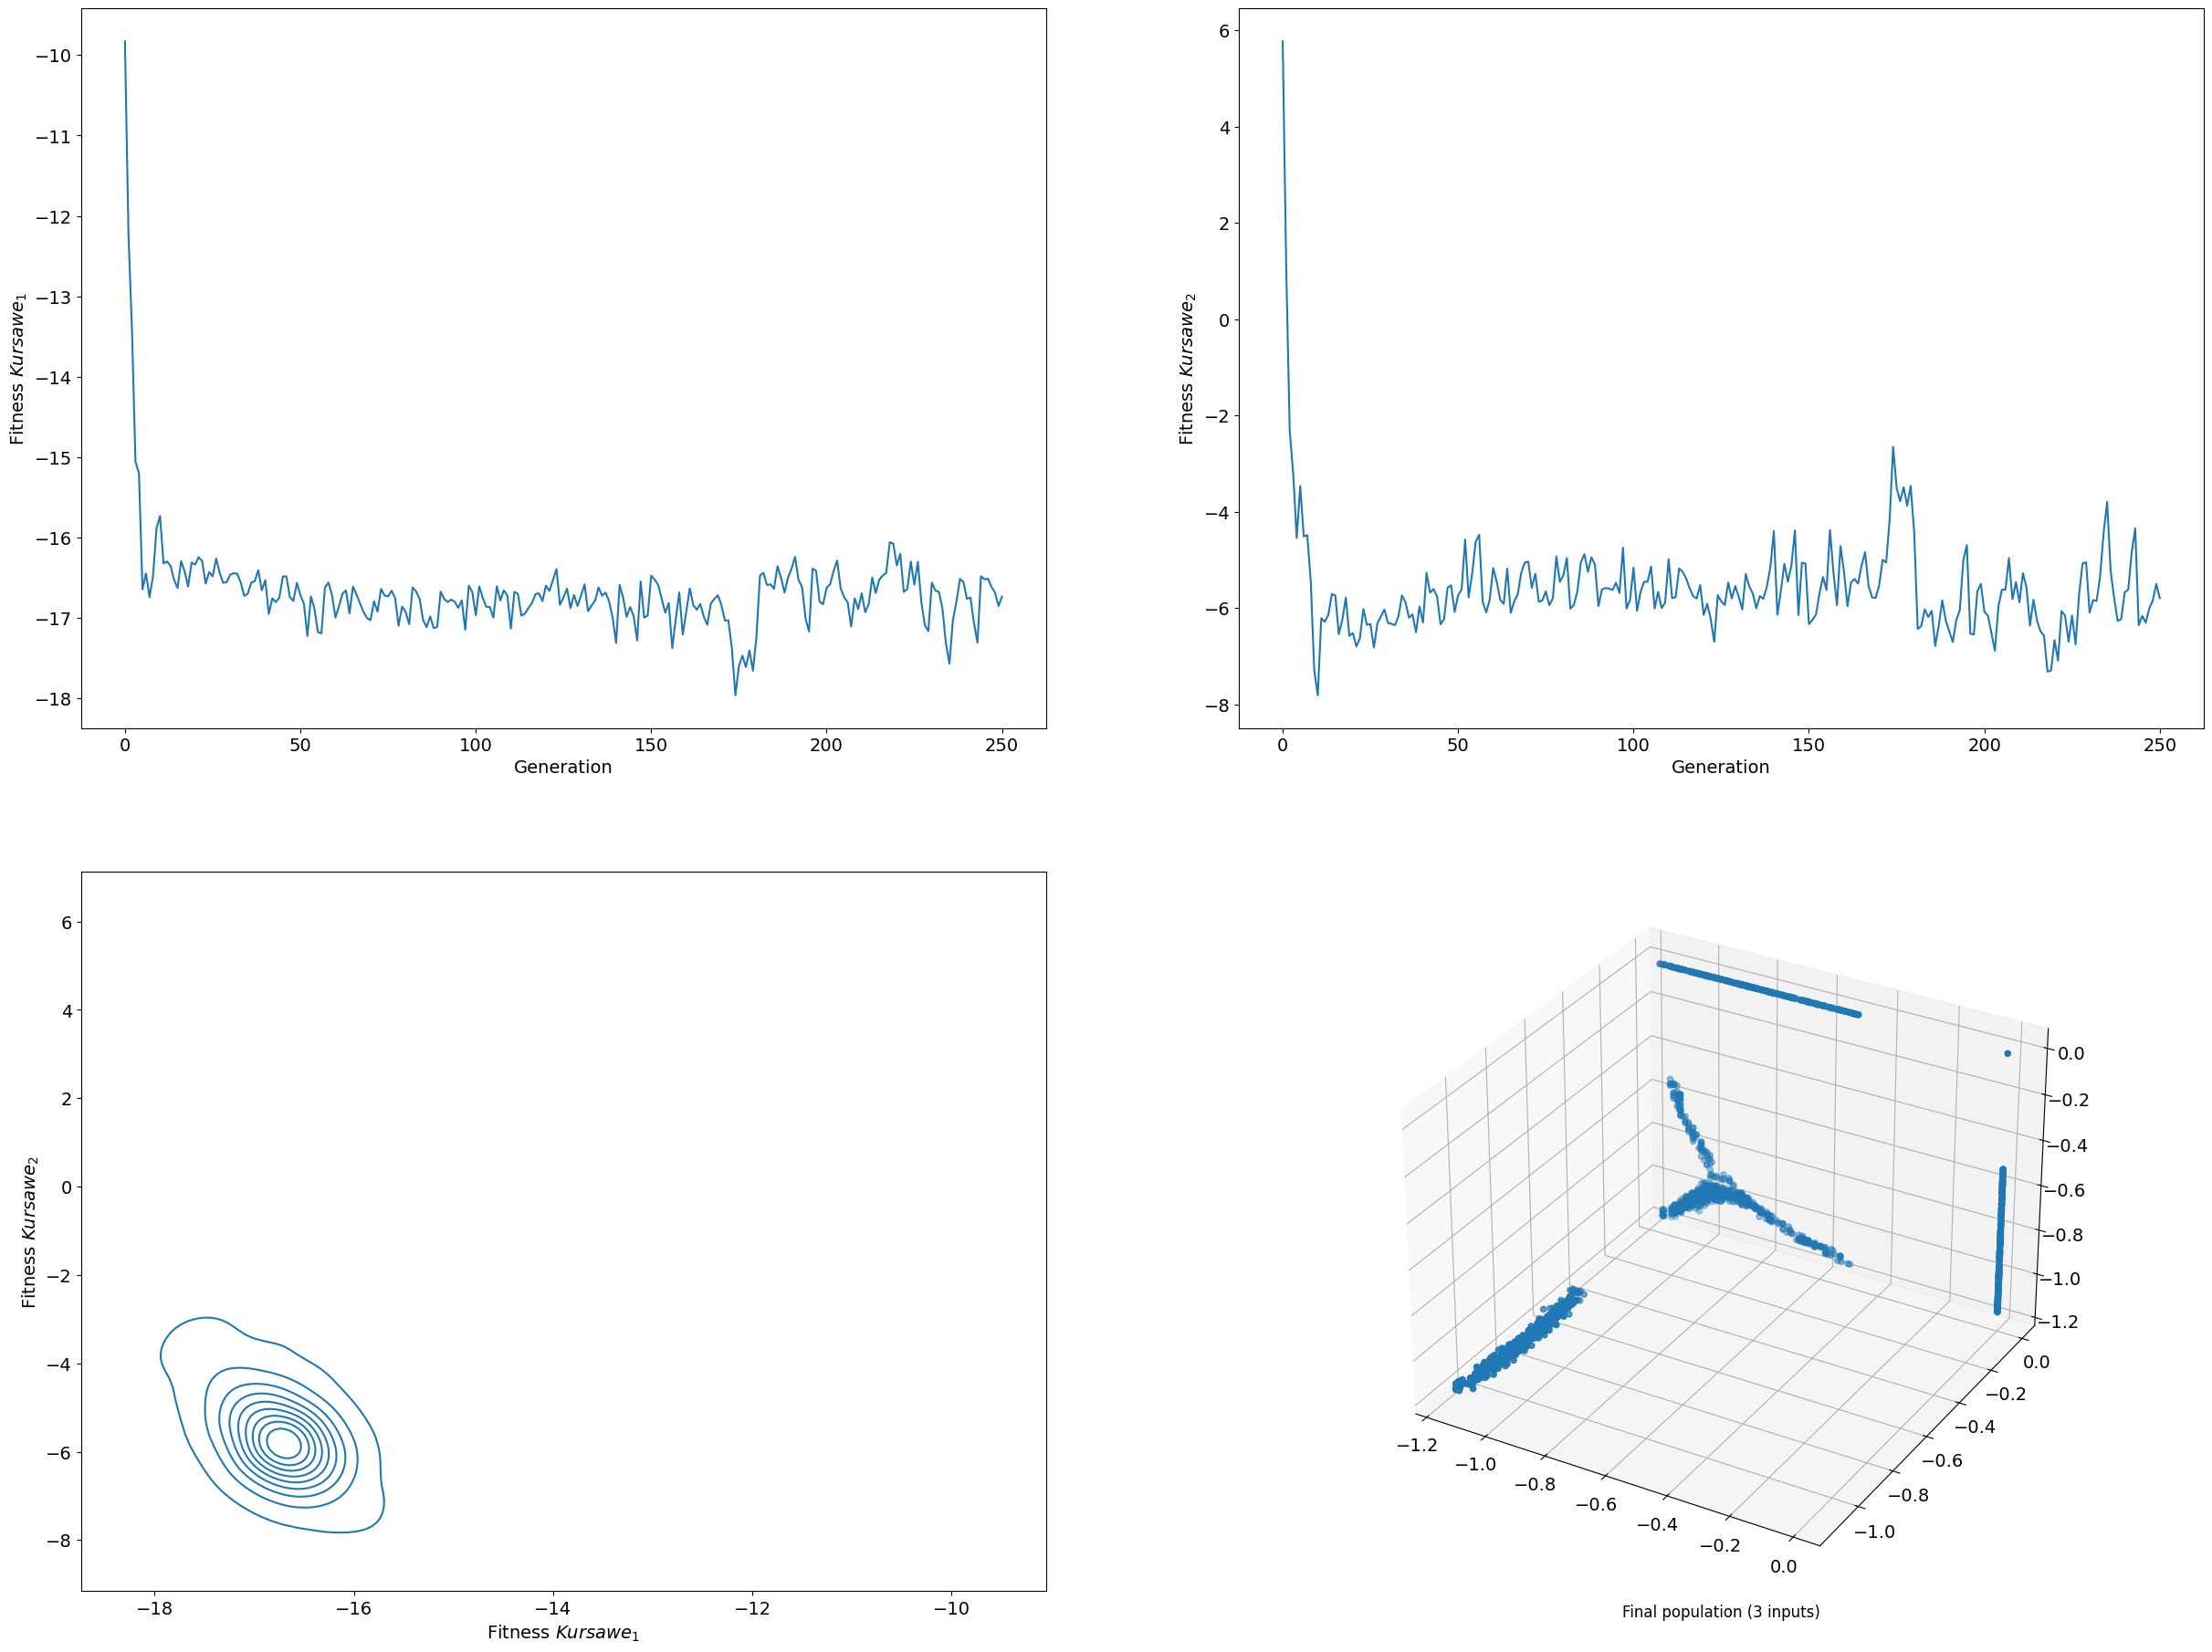

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns

popnp = np.array(hof.items)
gen = log.select("gen")
avgs = log.select("avg")
stds = log.select("std")
avgs_kurs_1 = [item[0] for item in avgs]
avgs_kurs_2 = [item[1] for item in avgs]
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("legend", fontsize=14)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 6))
line1 = ax1.plot(gen, avgs_kurs_1)
line2 = ax2.plot(gen, avgs_kurs_2)
ax1.set_xlabel("Generation")
ax1.set_ylabel(r"Fitness $Kursawe_1$")
ax2.set_xlabel("Generation")
ax2.set_ylabel(r"Fitness $Kursawe_2$")
sns.kdeplot(ax=ax3, x=avgs_kurs_1, y=avgs_kurs_2)
ax3.set_xlabel(r"Fitness $Kursawe_1$")
ax3.set_ylabel(r"Fitness $Kursawe_2$")
plt.subplots_adjust(top=3.0)
ax4.remove()  # remove the 2d axis lines
ax4 = fig.add_subplot(2, 2, 4, projection="3d")
ax4.scatter(xs=popnp[:, 0], ys=popnp[:, 1], zs=popnp[:, 2], marker="o")
ax4.set_title("Final population (3 inputs)", y=-0.05)

# <span style="color:blue">Task 2: Manually Implement the Mu Plus Lambda Algorithm</span>

Based on the walkthough, you probably used the built-in Mu Plus Lambda algorithm from DEAP to implement your algorithm. Implementing an EA in this way is important for NGSA II because it ultimately selects from both the parent and a child population together. Mu plus Lamda is technically an **Evolutionary Strategy algorithm**, rather than a Genetic Algorithm, because children are produced before selection. This means you need to generate a child population first. For this, no selection is used. Instead we create a population of offspring by either replicating a parent, crossing over two parents, or replicating and then mutating a parent. These populations are then combined for selection.

You can read more about the MuPlusLamnda algorithm [here](https://deap.readthedocs.io/en/master/api/algo.html)

To produce the offspring we can use the DEAP function [algorithms.VarOR](https://deap.readthedocs.io/en/master/api/algo.html#deap.algorithms.varOr)

*(Note: The VarAnd function is also available and is a shortcut to the approach you have been manually coding before, where you perform crossover and mutation with given probabilities).*

Pseudocode for the algorithm looks like this:

evaluate(population)

for g in range(ngen):    

      offspring = varOr(population, toolbox, lambda_, cxpb, mutpb)

      evaluate(offspring)

      population = select(population + offspring, mu)

**Your task:** Implement this algorithm yourself instead of using the built-in algorithm. You will also need to update the Pareto HoF manually using hof.update(pop)

In [258]:
logbook = tools.Logbook()
pop = toolbox.population(n=popSize)

fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

stats = tools.Statistics(
    lambda ind: ind.fitness.values
)  # cannot reset the stats object so just write over it
stats.register("avg", np.mean, axis=0)
stats.register("std", np.std, axis=0)
stats.register("min", np.min, axis=0)
stats.register("max", np.max, axis=0)
hof.clear()  # start with an empty hall of fame for this run
for g in range(NGEN):
    offspring = algorithms.varOr(pop, toolbox, LAMBDA, CXPB, MUTPB)
    fitnesses = map(toolbox.evaluate, offspring)
    for ind, fit in zip(offspring, fitnesses):
        ind.fitness.values = fit
    pop = toolbox.select(pop + offspring, MU)
    hof.update(pop)
    record = stats.compile(pop)
    logbook.record(gen=g, **record)
    print(record)

{'avg': array([-11.39811121,   0.78708345]), 'std': array([2.92316931, 4.45874404]), 'min': array([-17.93201522,  -8.43739261]), 'max': array([-5.34955308, 13.89255376])}
{'avg': array([-13.00911452,  -1.89348815]), 'std': array([3.32862929, 3.8899775 ]), 'min': array([-18.27845885,  -8.43739261]), 'max': array([-5.86647345,  8.05056492])}
{'avg': array([-15.11422851,  -2.98913285]), 'std': array([2.82037863, 3.5442691 ]), 'min': array([-18.40208011, -10.08245876]), 'max': array([-6.52679702,  6.39015093])}
{'avg': array([-15.99827181,  -4.16809028]), 'std': array([2.25901066, 2.87270219]), 'min': array([-19.20089684, -10.08245876]), 'max': array([-7.22957626,  2.38673265])}
{'avg': array([-16.27392159,  -4.90684667]), 'std': array([1.89975899, 3.09565194]), 'min': array([-19.60027548, -10.64213307]), 'max': array([-11.96586851,   0.89471987])}
{'avg': array([-16.85091021,  -4.86078206]), 'std': array([1.18784002, 2.50735938]), 'min': array([-19.87716465, -10.80369123]), 'max': array([

Text(0.5, -0.046000000000000006, 'Final population (3 inputs)')

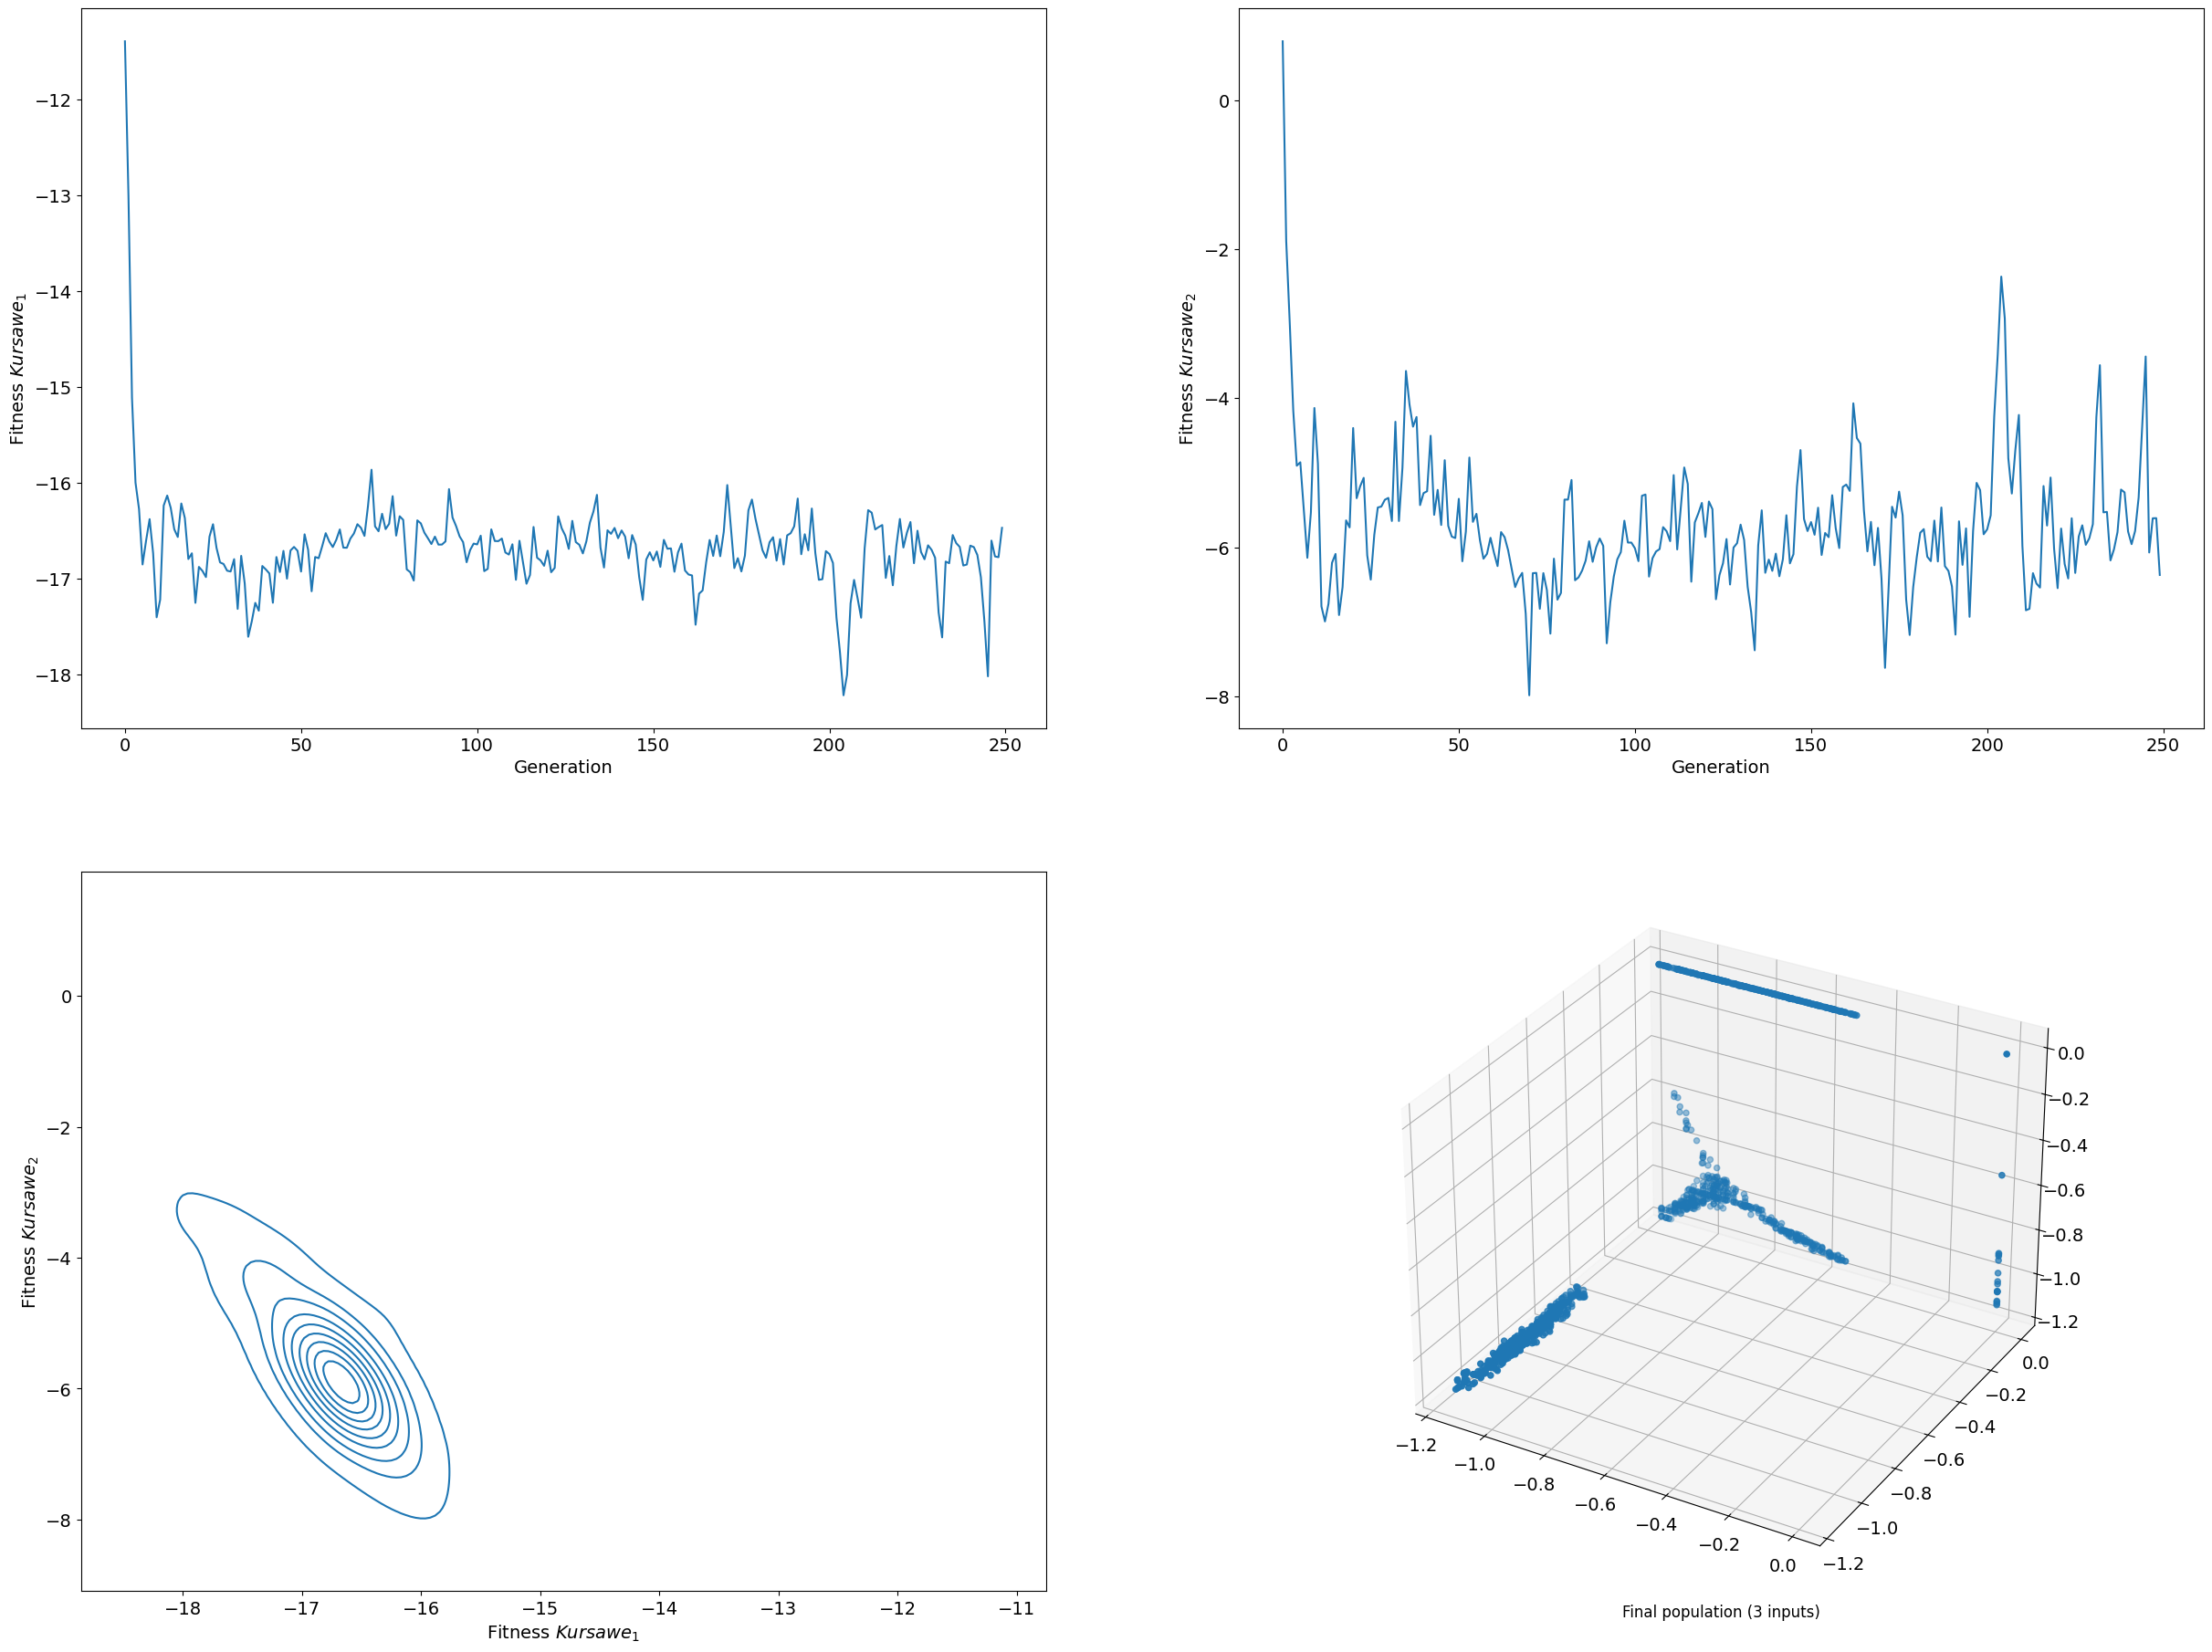

In [259]:
popnp = np.array(hof.items)
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")
avgs_kurs_1 = [item[0] for item in avgs]
avgs_kurs_2 = [item[1] for item in avgs]
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)
plt.rc("legend", fontsize=14)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(30, 6))
line1 = ax1.plot(gen, avgs_kurs_1)
line2 = ax2.plot(gen, avgs_kurs_2)
ax1.set_xlabel("Generation")
ax1.set_ylabel(r"Fitness $Kursawe_1$")
ax2.set_xlabel("Generation")
ax2.set_ylabel(r"Fitness $Kursawe_2$")
sns.kdeplot(ax=ax3, x=avgs_kurs_1, y=avgs_kurs_2)
ax3.set_xlabel(r"Fitness $Kursawe_1$")
ax3.set_ylabel(r"Fitness $Kursawe_2$")
plt.subplots_adjust(top=3.0)
ax4.remove()
ax4 = fig.add_subplot(2, 2, 4, projection="3d")
ax4.scatter(xs=popnp[:, 0], ys=popnp[:, 1], zs=popnp[:, 2], marker="o")
ax4.set_title("Final population (3 inputs)", y=-0.05)

# <span style="color:blue">Optional Task 3: Implement the knapsack problem using a list or numpy array instead of set</span>

To get you more used to inheriting from different data types for individuals, **your task** is to implement the knapsack problem from the accompanying walkthrough, but represent individuals with a Python dict rather than a set.  This will also require changing the mutation and crossover functions. Allow mutation to remove items from anywhere in the bag, rather than just pop from the top.

Important: If you want to use a numpy array, you must read this first:
[numpy and deap](https://deap.readthedocs.io/en/master/tutorials/advanced/numpy.html)
And for an example see this:
[numpy and deap example](https://deap.readthedocs.io/en/master/examples/ga_onemax_numpy.html?highlight=numpy)

In [260]:
NBR_ITEMS = 100  # The number of items to choose from
MAX_ITEM = 50  # Max items that can be in the bag
MAX_WEIGHT = 50  # Max weight of the bag
IND_INIT_SIZE = 5  # The initial number of random items in a bag for a new individual

In [261]:
def create_dict_individual() -> dict:
    return {
        "weight": random.randrange(0, MAX_WEIGHT),
        "value": random.randrange(0, 1000),
    }


create_dict_individual()

{'weight': 48, 'value': 608}

In [262]:
creator.create(
    "Fitness", base.Fitness, weights=(-1.0, 1.0)
)  # minimize weight, maximise value
creator.create("Individual", list, fitness=creator.Fitness)
toolbox = base.Toolbox()
toolbox.register(
    "individual",
    tools.initRepeat,
    creator.Individual,
    create_dict_individual,
    IND_INIT_SIZE,
)
toolbox.individual()

/Users/ivanbar/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Users/ivanbar/Library/Python/3.9/lib/python/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


[{'weight': 2, 'value': 646},
 {'weight': 4, 'value': 694},
 {'weight': 10, 'value': 188},
 {'weight': 41, 'value': 399},
 {'weight': 14, 'value': 447}]